                                        ## lectura de JSON y cracion de DataFrames ##

Importamos librerias para trabajar

In [1]:
import json
import pandas as pd
import numpy as np
import os
import ast
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler

Ruta relativa

In [2]:
# creamos las variables para las Rutas relativas a los archivos JSON

ruta_AUS_User_Reviews = os.path.join('JSON', 'australian_user_reviews.json')

ruta_AUS_User_Items = os.path.join('JSON', 'australian_users_items.json')

ruta_Output_Steam_Games = os.path.join('JSON', 'output_steam_games.json')

Leemos los archivos .JSON y los cargamos a un Dataframe

In [3]:
# vamos a leer el contenido del archivo JSON (australian_user_reviews.json)
with open(ruta_AUS_User_Reviews, 'r', encoding='utf-8') as f:
    data = f.readlines()

# vamos a convertir las lineas en registros
records = [eval(line.strip()) for line in data]

# Creamos el DataFrame a partir de los records o registros
df_UserReviews= pd.DataFrame(records)

In [4]:
# vamos a leer el contenido del archivo JSON (australian_users_items.json)
rows = []
with open (ruta_AUS_User_Items, encoding='MacRoman') as f:
    for line in f.readlines():
        rows.append(ast.literal_eval(line))

# Creamos el DataFrame a partir de los records o registros
df_UserItems = pd.DataFrame(rows)

In [6]:
# vamos a leer el contenido del archivo JSON (output_steam_games.json)

# Creamos el DataFrame a partir leer el .json
df_OutputSteamGames=pd.read_json(ruta_Output_Steam_Games,lines=True, encoding='MacRoman')

Chequeamos los dataframes creados anteriormente y procesedemos a desanidar las columnas anidadas

                                                df_UserReviews

In [163]:
# Podemos verificar la estructura y tipo de dato del dataframe
df_UserReviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25799 entries, 0 to 25798
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   25799 non-null  object
 1   user_url  25799 non-null  object
 2   reviews   25799 non-null  object
dtypes: object(3)
memory usage: 604.8+ KB


In [164]:
# Chequeamos como quedo el Dataframe df_UserReviews
df_UserReviews.head()

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."


Como podemos ver en el dataframe, en la columna reviews, los datos se encuentran anidados, por ende procederemos a desanidar los datos y cargarlos en el dataframe

In [10]:
# Desanidamos la columna review
desanidado = []
for index, row in df_UserReviews.iterrows():
    user_id = row['user_id']
    user_url = row['user_url']
    for review_dict in row['reviews']:
        review_dict['user_id'] = user_id
        review_dict['user_url'] = user_url
        desanidado.append(review_dict)

df_UserReviews = pd.DataFrame(desanidado)

Chequeamos el dataframe df_UserReviews

In [13]:
# Volvemos a chequear el dataframe df_UserReviews
df_UserReviews.head()

,funny,posted,last_edited,item_id,helpful,recommend,review,user_id,user_url
0,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,76561197970982479,http://steamcommunity.com/profiles/76561197970...
2,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479,http://steamcommunity.com/profiles/76561197970...
3,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,js41637,http://steamcommunity.com/id/js41637
4,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,js41637,http://steamcommunity.com/id/js41637


In [14]:
df_UserReviews.tail()

,funny,posted,last_edited,item_id,helpful,recommend,review,user_id,user_url
59300,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...,76561198312638244,http://steamcommunity.com/profiles/76561198312...
59301,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...,76561198312638244,http://steamcommunity.com/profiles/76561198312...
59302,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...,LydiaMorley,http://steamcommunity.com/id/LydiaMorley
59303,,Posted July 20.,,730,No ratings yet,True,:D,LydiaMorley,http://steamcommunity.com/id/LydiaMorley
59304,,Posted July 2.,,440,No ratings yet,True,so much fun :D,LydiaMorley,http://steamcommunity.com/id/LydiaMorley


In [12]:
df_UserReviews.describe()

,funny,posted,last_edited,item_id,helpful,recommend,review,user_id,user_url
count,59305,59305,59305,59305,59305,59305,59305,59305,59305
unique,186,1906,1015,3682,1344,2,55313,25458,25458
top,,"Posted June 21, 2014.",,730,No ratings yet,True,good game,76561198094665607,http://steamcommunity.com/profiles/76561198094...
freq,51154,225,53165,3759,30168,52473,100,20,20


                                            df_UserItems

In [15]:
df_UserItems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88310 entries, 0 to 88309
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      88310 non-null  object
 1   items_count  88310 non-null  int64 
 2   steam_id     88310 non-null  object
 3   user_url     88310 non-null  object
 4   items        88310 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.4+ MB


In [16]:
# Chequeamos como quedo el Dataframe df_UserItems
df_UserItems.head()

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."


Como se ve en este Dataframe tambien estan anidados datos en la columna items. procedemos a desanidar la misma

In [17]:
# Desanidamos la columna items

desanidado = []
for index, row in df_UserItems.iterrows():
    user_id = row['user_id']
    user_url = row['user_url']
    user_items_count = row['items_count']
    for df_items_dict in row['items']:
        df_items_dict['user_id'] = user_id
        df_items_dict['user_url'] = user_url
        df_items_dict['items_count'] = user_items_count
        desanidado.append(df_items_dict)

df_UserItems = pd.DataFrame(desanidado)

Chequeamos el dataframe df_UserItems

In [18]:
# Volvemos a chequear el dataframe df_UserItems
df_UserItems.head()

,item_id,item_name,playtime_forever,playtime_2weeks,user_id,user_url,items_count
0,10,Counter-Strike,6,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,277
1,20,Team Fortress Classic,0,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,277
2,30,Day of Defeat,7,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,277
3,40,Deathmatch Classic,0,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,277
4,50,Half-Life: Opposing Force,0,0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,277


In [19]:
df_UserItems.tail()

,item_id,item_name,playtime_forever,playtime_2weeks,user_id,user_url,items_count
5153204,346330,BrainBread 2,0,0,76561198329548331,http://steamcommunity.com/profiles/76561198329...,7
5153205,373330,All Is Dust,0,0,76561198329548331,http://steamcommunity.com/profiles/76561198329...,7
5153206,388490,One Way To Die: Steam Edition,3,3,76561198329548331,http://steamcommunity.com/profiles/76561198329...,7
5153207,521570,You Have 10 Seconds 2,4,4,76561198329548331,http://steamcommunity.com/profiles/76561198329...,7
5153208,519140,Minds Eyes,3,3,76561198329548331,http://steamcommunity.com/profiles/76561198329...,7


In [20]:
df_UserItems.describe()

,playtime_forever,playtime_2weeks,items_count
count,5.153209e+06,5.153209e+06,5.153209e+06
mean,9.914951e+02,9.104707e+00,3.147229e+02
std,5.418204e+03,1.403926e+02,6.933596e+02
min,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,0.000000e+00,7.200000e+01
50%,3.400000e+01,0.000000e+00,1.380000e+02
75%,3.550000e+02,0.000000e+00,2.760000e+02
max,6.427730e+05,1.996700e+04,7.762000e+03


                                            df_OutputSteamGames

Chequamos como quedo el dataframe

In [171]:
df_OutputSteamGames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24083 non-null  object 
 1   genres        28852 non-null  object 
 2   app_name      32133 non-null  object 
 3   title         30085 non-null  object 
 4   url           32135 non-null  object 
 5   release_date  30068 non-null  object 
 6   tags          31972 non-null  object 
 7   reviews_url   32133 non-null  object 
 8   specs         31465 non-null  object 
 9   price         30758 non-null  object 
 10  early_access  32135 non-null  float64
 11  id            32133 non-null  float64
 12  developer     28836 non-null  object 
dtypes: float64(2), object(11)
memory usage: 11.9+ MB


In [172]:
# Chequeamos como quedo el Dataframe df_OutputSteamGames
df_OutputSteamGames.head()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
1,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
2,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
3,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
4,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None


In [173]:
# Chequeamos como quedo el Dataframe df_OutputSteamGames los registros del final del df
df_OutputSteamGames.tail()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,0.0,773640.0,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,0.0,733530.0,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,0.0,610660.0,Laush Dmitriy Sergeevich
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,0.0,658870.0,"xropi,stev3ns"
120444,None,None,Maze Run VR,None,http://store.steampowered.com/app/681550/Maze_...,None,"[Early Access, Adventure, Indie, Action, Simul...",http://steamcommunity.com/app/681550/reviews/?...,"[Single-player, Stats, Steam Leaderboards, HTC...",4.99,1.0,681550.0,None


In [21]:
df_OutputSteamGames.describe()

,early_access,id
count,32135.000000,3.213300e+04
mean,0.060588,4.517574e+05
std,0.238577,1.827140e+05
min,0.000000,1.000000e+01
25%,0.000000,3.292800e+05
50%,0.000000,4.520600e+05
75%,0.000000,5.934000e+05
max,1.000000,2.028850e+06


                                    Proceso de Transformacion de datos

En este paso empezaremos la transformación de datos.
Vamos a evaluar el Dataframe y analizar que columnas son relevantes, tambien vamos a chequear datos nulos y rellenar filas con nulos para los campos que lo precisan.

Empezamos a analizar el Dataframe df_UserItems

In [22]:
# Vizualizamos el dataframe para evaluar que columnas son utiles
df_UserItems.sort_values(by='playtime_forever', ascending=False).head()

,item_id,item_name,playtime_forever,playtime_2weeks,user_id,user_url,items_count
587715,4000,Garry's Mod,642773,7299,wolop,http://steamcommunity.com/id/wolop,107
2499068,212200,Mabinogi,635295,0,Evilutional,http://steamcommunity.com/id/Evilutional,78
4075729,42710,Call of Duty: Black Ops - Multiplayer,632452,8126,76561198019826668,http://steamcommunity.com/profiles/76561198019...,12
1495340,4000,Garry's Mod,613411,588,76561198039832932,http://steamcommunity.com/profiles/76561198039...,90
1836985,72200,Universe Sandbox,600068,0,tsunamitad,http://steamcommunity.com/id/tsunamitad,793


Eliminar Columnas No Necesarias

In [23]:
# Eliminamos las columnas que no son utiles para el desarrollo del proyecto
df_UserItems = df_UserItems.drop(['user_url', 'playtime_2weeks'], axis=1)

In [24]:
# Chequeamos como quedo df_UserItems
df_UserItems.head()

,item_id,item_name,playtime_forever,user_id,items_count
0,10,Counter-Strike,6,76561197970982479,277
1,20,Team Fortress Classic,0,76561197970982479,277
2,30,Day of Defeat,7,76561197970982479,277
3,40,Deathmatch Classic,0,76561197970982479,277
4,50,Half-Life: Opposing Force,0,76561197970982479,277


Verificamos los valores nulos del Dataframe

In [27]:
# Verificamos valores nulos en cada columna
valores_nulos_por_columna = df_UserItems.isnull().sum()

# imprimimos los resultados
print(valores_nulos_por_columna)

item_id             0
item_name           0
playtime_forever    0
user_id             0
items_count         0
dtype: int64


Verificamos los valores duplicados

In [30]:
# Verificamos filas duplicadas en el dataframe
duplicados = df_UserItems.duplicated()

# Mostramos los duplicados
print(df_UserItems[duplicados])

        item_id                             item_name  playtime_forever  \
164294       20                 Team Fortress Classic                 5   
164295       50             Half-Life: Opposing Force                 0   
164296       70                             Half-Life                 0   
164297      130                 Half-Life: Blue Shift                 0   
164298      220                           Half-Life 2               198   
...         ...                                   ...               ...   
4898223  213670  South Park‚Ñ¢: The Stick of Truth‚Ñ¢               725   
4898224  221910                   The Stanley Parable                53   
4898225  261030          The Walking Dead: Season Two               253   
4898226  273110         Counter-Strike Nexon: Zombies                 0   
4898227     730      Counter-Strike: Global Offensive                 0   

                   user_id  items_count  
164294              Nikiad          109  
164295         

In [31]:
# Obtenemos el número de filas y columnas usando shape
num_filas, num_columnas = df_UserItems.shape
print(f'Número de filas: {num_filas}, Número de columnas: {num_columnas}')

Número de filas: 5153209, Número de columnas: 5


In [32]:
# Procedemos a borrar los duplicados
df_UserItems.drop_duplicates(inplace=True)

In [33]:
# Obtenemos el número de filas y columnas usando shape, que nos quedo despues de dropear duplicados
num_filas, num_columnas = df_UserItems.shape
print(f'Número de filas: {num_filas}, Número de columnas: {num_columnas}')

Número de filas: 5094092, Número de columnas: 5


Reorganizar y renombrar columnas

In [34]:
# vamos a renombrar las columnas en una manera standard y siguiendo buenas practicas 
df_UserItems = df_UserItems.rename(columns={'item_id': 'ItemId'})
df_UserItems = df_UserItems.rename(columns={'item_name': 'ItemName'})
df_UserItems = df_UserItems.rename(columns={'playtime_forever': 'PlaytimeForever'})
df_UserItems = df_UserItems.rename(columns={'user_id': 'UserId'})
df_UserItems = df_UserItems.rename(columns={'items_count': 'ItemsCount'})

In [35]:
# chequeamos los cambios en el nombre de la columna y chequeamos los tipos de datos de las columnas
df_UserItems.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5094092 entries, 0 to 5153208
Data columns (total 5 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   ItemId           object
 1   ItemName         object
 2   PlaytimeForever  int64 
 3   UserId           object
 4   ItemsCount       int64 
dtypes: int64(2), object(3)
memory usage: 233.2+ MB


Convertir tipos de datos

In [36]:
# chequeamos los tipos de datos del dataframe
df_UserItems.dtypes

ItemId             object
ItemName           object
PlaytimeForever     int64
UserId             object
ItemsCount          int64
dtype: object

Corremos el siguiente codigo para chequear si los valores de la columna ItemId son enteros ya que son los ids de los titulos y considero importante chequear

In [37]:
# 'ItemId' es la columna que deseas verificar
df_UserItems['ItemId'] = pd.to_numeric(df_UserItems['ItemId'], errors='coerce')

# Filtramos las filas que no son enteros
es_entero = df_UserItems['ItemId'].notnull() & (df_UserItems['ItemId'] % 1 == 0)
resultados = df_UserItems[~es_entero]

# Mostrar los resultados
print(resultados)

Empty DataFrame
Columns: [ItemId, ItemName, PlaytimeForever, UserId, ItemsCount]
Index: []


un DataFrame vacío, indica que no se encontraron filas que cumplieran con la condición especificada en tu filtro. En otras palabras, todos los valores en la columna 'ItemId' parecen ser numéricos (o NaN después de la conversión) y cumplen con la condición de ser enteros.

In [38]:
# cambiamos el tipo de dato de la columna ItemId a int
df_UserItems['ItemId'] = df_UserItems['ItemId'].astype(int)

In [39]:
# cambiamos el tipo de dato de la columna ItemsCount a int
df_UserItems['ItemsCount'] = df_UserItems['ItemsCount'].astype(int)

In [40]:
# cambiamos el tipo de dato de la columna PlaytimeForever a int
df_UserItems['PlaytimeForever'] = df_UserItems['PlaytimeForever'].astype(int)

In [41]:
# cambiamos el tipo de dato de la columna UserId a str
df_UserItems['UserId'] = df_UserItems['UserId'].astype(str)

In [42]:
# cambiamos el tipo de dato de la columna ItemName a str
df_UserItems['ItemName'] = df_UserItems['ItemName'].astype(str)

**Observacion:**

En Python, el tipo de datos de texto se conoce como secuencia de caracteres (string). En Pandas se los conoce como objetos (object). Las secuencias de caracteres pueden contener números y / o caracteres.

chequeamos como nos quedaron los cambios de tipo de datos

In [43]:
# chequeamos los tipos de datos del dataframe
tipos_de_datos = df_UserItems.dtypes
print(tipos_de_datos)

ItemId              int32
ItemName           object
PlaytimeForever     int32
UserId             object
ItemsCount          int32
dtype: object


Analizamos como nos quedo el dataframe final que vamos a guardar como un csv ya transformado

In [59]:
df_UserItems.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5094092 entries, 0 to 5153208
Data columns (total 5 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   ItemId           int32 
 1   ItemName         object
 2   PlaytimeForever  int32 
 3   UserId           object
 4   ItemsCount       int32 
dtypes: int32(3), object(2)
memory usage: 174.9+ MB


In [192]:
# chequeamos como nos quedo el dataframe df_UserItems con los procesos de transformacion realizados
df_UserItems.head()

,ItemId,ItemName,PlaytimeForever,UserId,ItemsCount
0,10,Counter-Strike,6,76561197970982479,277
1,20,Team Fortress Classic,0,76561197970982479,277
2,30,Day of Defeat,7,76561197970982479,277
3,40,Deathmatch Classic,0,76561197970982479,277
4,50,Half-Life: Opposing Force,0,76561197970982479,277


In [51]:
df_UserItems.tail()

,ItemId,ItemName,PlaytimeForever,UserId,ItemsCount
5153204,346330,BrainBread 2,0,76561198329548331,7
5153205,373330,All Is Dust,0,76561198329548331,7
5153206,388490,One Way To Die: Steam Edition,3,76561198329548331,7
5153207,521570,You Have 10 Seconds 2,4,76561198329548331,7
5153208,519140,Minds Eyes,3,76561198329548331,7


In [47]:
# Vemos nulos
df_UserItems.isnull().sum()

ItemId             0
ItemName           0
PlaytimeForever    0
UserId             0
ItemsCount         0
dtype: int64

In [50]:
# Datos duplicados
df_UserItems.duplicated().sum()

0

In [60]:
# Establecer opción de formato para obtener datos mas legibles en describe
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [61]:
df_UserItems['ItemName'].describe()

count         5094092
unique          10947
top       Dota 2 Test
freq            49136
Name: ItemName, dtype: object

In [62]:
df_UserItems['ItemsCount'].describe()

count   5094092.00
mean        315.73
std         696.91
min           1.00
25%          71.00
50%         137.00
75%         275.00
max        7762.00
Name: ItemsCount, dtype: float64

In [63]:
df_UserItems['PlaytimeForever'].describe()

count   5094092.00
mean        990.51
std        5414.11
min           0.00
25%           0.00
50%          34.00
75%         355.00
max      642773.00
Name: PlaytimeForever, dtype: float64

Podemos ver los siguientes datos:

el promedio de de juegos que poseen los jugadores es de 316 juegos

La cuenta con mas juegos tiene 7762 juegos

El promedio de horas jugadas de los juegos es de 16.5 horas (990/60, para obtener las horas)

El promedio maximo de horas jugadas de un juego es de 642 horas (642773/60 para obtener las horas)

El juego mas jugado es el Dota 2 Test

Analizamos la cantidad de juegos que tiene un usuario tomando los campos UserId y ItemsCount

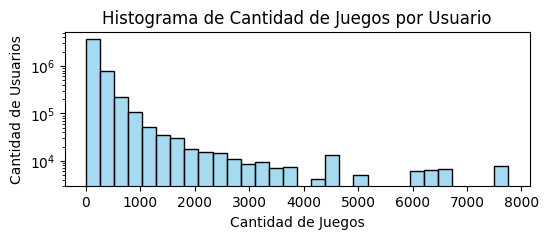

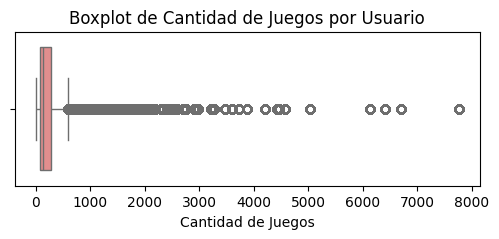

In [78]:
# DataFrame con la cantidad de juegos por usuario
user_item_counts = df_UserItems.groupby('UserId')['ItemsCount'].count().reset_index()

# Histograma con escala logarítmica
plt.figure(figsize=(6, 2))
sns.histplot(df_UserItems['ItemsCount'], bins=30, kde=False, color='skyblue')
plt.title('Histograma de Cantidad de Juegos por Usuario')
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Cantidad de Usuarios')
plt.yscale('log')  # Aplicar escala logarítmica al eje y
plt.show()

# Boxplot
plt.figure(figsize=(6, 2))
sns.boxplot(x=df_UserItems['ItemsCount'], color='lightcoral')
plt.title('Boxplot de Cantidad de Juegos por Usuario')
plt.xlabel('Cantidad de Juegos')
plt.show()

La cantidad de minutos jugados por usuario

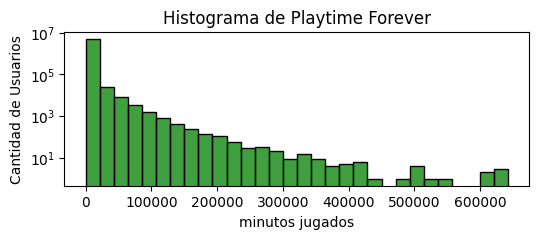

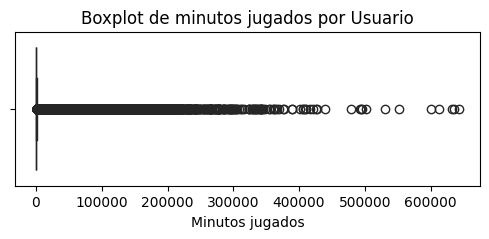

In [77]:
# Histograma con escala logarítmica
plt.figure(figsize=(6, 2))
sns.histplot(df_UserItems['PlaytimeForever'], bins=30, kde=False, color='green')
plt.title('Histograma de Playtime Forever')
plt.xlabel('minutos jugados')
plt.ylabel('Cantidad de Usuarios')
plt.yscale('log')  # Aplicar escala logarítmica al eje y
plt.show()

# Boxplot
plt.figure(figsize=(6, 2))
sns.boxplot(x=df_UserItems['PlaytimeForever'], color='green')
plt.title('Boxplot de minutos jugados por Usuario')
plt.xlabel('Minutos jugados')
plt.show()

**Aclaracion:**

la columna PlaytimeForever representa la cantidad de MINUTOS que el usuario jugo ese juego.
esta representado en minutos, pero divienedo la columna sobre 60 , obtenemos la cantidad de horas jugadas totales de ese usuario en ese juego.
Por el momento no lo vamos a transformar, lo dejaremos asi y cambiaremos ese valor cuando la funcion nos pida que repesentemos la respuesta en hora, de lo contrario para las otras funciones podemos utilizar el valor como esta expresado para realizar lo que precisemos.

Ahora guardamos el Dataframe en un .csv ya con los procesos de transformacion realizados

In [193]:
# Definimos la ruta relativa
ruta_relativa = os.path.join('Datasets-Limpios', 'user_items.parquet')

# Guardamos el DataFrame en un archivo CSV con la ruta relativa
df_UserItems.to_parquet(ruta_relativa, index=False)

-----------------------------------------------------------------------------------------------------------------------

Analizamos el Dataframe df_OutputSteamGames

In [79]:
# chequeamos el dataset df_outputSteamgames
df_OutputSteamGames.head()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
1,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
2,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
3,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
4,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None


Verificamos que varias filas no contienen datos y hay que eliminarlas

In [80]:
# Borramos las filas donde todos los valores son None o nan
df_OutputSteamGames.dropna(how='all', inplace=True)

In [81]:
# Chequeamos el dataframe para ver como quedo
df_OutputSteamGames.head()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88310,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0.00,761140.00,Kotoshiro
88311,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,0.00,643980.00,Secret Level SRL
88312,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,0.00,670290.00,Poolians.com
88313,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,0.00,767400.00,彼岸领域
88314,None,None,Log Challenge,None,http://store.steampowered.com/app/773570/Log_C...,None,"[Action, Indie, Casual, Sports]",http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,0.00,773570.00,None


Verificamos los valores duplicados dentro de df_OutptSteamGames

In [82]:
# Obtenemos el número de filas y columnas usando shape
num_filas, num_columnas = df_OutputSteamGames.shape
print(f'Número de filas: {num_filas}, Número de columnas: {num_columnas}')

Número de filas: 32135, Número de columnas: 13


In [83]:
df_OutputSteamGames.columns

Index(['publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'reviews_url', 'specs', 'price', 'early_access', 'id',
       'developer'],
      dtype='object')

In [84]:
# Verificamos filas duplicadas en el dataframe
columnas_a_verificar = ['publisher', 'app_name', 'title', 'url', 'release_date',
                        'reviews_url', 'price', 'early_access', 'id',
                        'developer']
duplicados_en_columnas = df_OutputSteamGames.duplicated(subset=columnas_a_verificar)

# Mostramos los duplicados
print(df_OutputSteamGames[duplicados_en_columnas])

Empty DataFrame
Columns: [publisher, genres, app_name, title, url, release_date, tags, reviews_url, specs, price, early_access, id, developer]
Index: []


Verificamos sacando las listas que no hay valores duplicados

Vemos los valores nulos del Dataframe

In [85]:
# Chequemos el dataframe para ver la cantidad de valores nulos
df_OutputSteamGames.isnull().sum()

publisher       8052
genres          3283
app_name           2
title           2050
url                0
release_date    2067
tags             163
reviews_url        2
specs            670
price           1377
early_access       0
id                 2
developer       3299
dtype: int64

In [86]:
len(df_OutputSteamGames)

32135

**Nota:** 

Podemos ver en el campo 'genres' los valores faltantes son 3283, pero la informacion que falta podriamos sacarla del campo 'tags', solo que habria que obtener de ese campo los datos del genero y no el resto. Esa podria ser una buena solucion al problema.

Vemos que en el campo app_name y title contienen una informacion redundante, ya que los dos campos describen el titulo de la aplicacion solo que en dos formatos diferentes.
En este caso podemos utilizar el campo app_name para identificar el titulo del producto porque como vemos en los datos nulos o faltantes en ese campo solo tiene 2 faltantes.

Para el campo release_date vamos a cambiar el tipo de dato

el Campo 'developer' es importante conteniendo solo 3299 faltantes de 32135 totales.

Eliminar Columnas No Necesarias

In [87]:
df_OutputSteamGames.columns

Index(['publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'reviews_url', 'specs', 'price', 'early_access', 'id',
       'developer'],
      dtype='object')

In [88]:
# Eliminamos las columnas que no son utiles para el desarrollo del proyecto
df_OutputSteamGames.drop(columns=["publisher","title","url","early_access","reviews_url","specs"], inplace=True)

In [89]:
# Chequeamos como quedo el Dataframe
df_OutputSteamGames.head()

,genres,app_name,release_date,tags,price,id,developer
88310,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.99,761140.00,Kotoshiro
88311,"[Free to Play, Indie, RPG, Strategy]",Ironbound,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",Free To Play,643980.00,Secret Level SRL
88312,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",Free to Play,670290.00,Poolians.com
88313,"[Action, Adventure, Casual]",弹炸人2222,2017-12-07,"[Action, Adventure, Casual]",0.99,767400.00,彼岸领域
88314,None,Log Challenge,None,"[Action, Indie, Casual, Sports]",2.99,773570.00,None


Reorganizamos y renombramos las columnas

In [90]:
# chequeamos la columnas nombradas anteriormente para df_UserItems
df_UserItems.columns

Index(['ItemId', 'ItemName', 'PlaytimeForever', 'UserId', 'ItemsCount'], dtype='object')

In [91]:
#chequeamos los nombres de las columnas
df_OutputSteamGames.columns

Index(['genres', 'app_name', 'release_date', 'tags', 'price', 'id',
       'developer'],
      dtype='object')

In [92]:
# vamos a renombrar las columnas en una manera standard y siguiendo buenas practicas 
df_OutputSteamGames = df_OutputSteamGames.rename(columns={'genres': 'Genres'}) 
df_OutputSteamGames = df_OutputSteamGames.rename(columns={'app_name': 'Title'})
df_OutputSteamGames = df_OutputSteamGames.rename(columns={'release_date': 'ReleaseDate'})
df_OutputSteamGames = df_OutputSteamGames.rename(columns={'price': 'Price'})
df_OutputSteamGames = df_OutputSteamGames.rename(columns={'id': 'ItemId'})
df_OutputSteamGames = df_OutputSteamGames.rename(columns={'developer': 'Developer'})
df_OutputSteamGames = df_OutputSteamGames.rename(columns={'tags': 'Tags'})


In [93]:
# chequeamos los cambios de nombres de columnas
df_OutputSteamGames.head(1)

,Genres,Title,ReleaseDate,Tags,Price,ItemId,Developer
88310,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.99,761140.00,Kotoshiro


verificamos el tipo de dato de las columnas

In [94]:
# chequeamos los tipos de datos del dataframe
df_OutputSteamGames.dtypes

Genres          object
Title           object
ReleaseDate     object
Tags            object
Price           object
ItemId         float64
Developer       object
dtype: object

Como vemos para los campos Genres, Title, Tags y Developer los tipos de datos quedaran en tipo object

In [95]:
df_OutputSteamGames.head(2)

,Genres,Title,ReleaseDate,Tags,Price,ItemId,Developer
88310,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.99,761140.00,Kotoshiro
88311,"[Free to Play, Indie, RPG, Strategy]",Ironbound,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",Free To Play,643980.00,Secret Level SRL


Cambiamos los tipos de datos de las columnas

Para cambiar los siguientes tipos de datos de las columnas, tenemos que revisar los datos que contienen

In [96]:
# chequeamos que datos contiene la columna ReleaseDate
print(df_OutputSteamGames['ReleaseDate'].unique())

['2018-01-04' '2017-07-24' '2017-12-07' ... '2016-11-19' 'January 2018'
 '2018-10-01']


In [97]:
# cambiamos el tipo de dato de la columna ReleaseDate a datetime format
df_OutputSteamGames['ReleaseDate'] = pd.to_datetime(df_OutputSteamGames['ReleaseDate'], errors='coerce', format='%Y-%m-%d', exact=False)

In [98]:
# Confirmamos el cambio de formato
print(df_OutputSteamGames['ReleaseDate'].unique())

['2018-01-04T00:00:00.000000000' '2017-07-24T00:00:00.000000000'
 '2017-12-07T00:00:00.000000000' ... '2004-03-01T00:00:00.000000000'
 '2016-11-19T00:00:00.000000000' '2018-10-01T00:00:00.000000000']


In [99]:
df_OutputSteamGames['ReleaseDate']

88310    2018-01-04
88311    2018-01-04
88312    2017-07-24
88313    2017-12-07
88314           NaT
            ...    
120440   2018-01-04
120441   2018-01-04
120442   2018-01-04
120443   2017-09-02
120444          NaT
Name: ReleaseDate, Length: 32135, dtype: datetime64[ns]

In [100]:
# chequeamos que datos contiene la columna Price
print(df_OutputSteamGames['Price'].unique())

[4.99 'Free To Play' 'Free to Play' 0.99 2.99 3.99 9.99 18.99 29.99 None
 'Free' 10.99 1.5899999999999999 14.99 1.99 59.99 8.99 6.99 7.99 39.99
 19.99 7.49 12.99 5.99 2.49 15.99 1.25 24.99 17.99 61.99 3.49 11.99 13.99
 'Free Demo' 'Play for Free!' 34.99 74.76 1.49 32.99 99.99 14.95 69.99
 16.99 79.99 49.99 5.0 44.99 13.98 29.96 119.99 109.99 149.99 771.71
 'Install Now' 21.99 89.99 'Play WARMACHINE: Tactics Demo' 0.98 139.92
 4.29 64.99 'Free Mod' 54.99 74.99 'Install Theme' 0.89 'Third-party' 0.5
 'Play Now' 299.99 1.29 3.0 15.0 5.49 23.99 49.0 20.99 10.93
 1.3900000000000001 'Free HITMAN™ Holiday Pack' 36.99 4.49 2.0 4.0 9.0
 234.99 1.9500000000000002 1.5 199.0 189.0 6.66 27.99 10.49 129.99 179.0
 26.99 399.99 31.99 399.0 20.0 40.0 3.33 199.99 22.99 320.0 38.85 71.7
 59.95 995.0 27.49 3.39 6.0 19.95 499.99 16.06 4.68 131.4 44.98 202.76 1.0
 2.3 0.9500000000000001 172.24 249.99 2.9699999999999998 10.96 10.0 30.0
 2.66 6.48 19.29 11.15 18.9 2.89 'Play the Demo' 99.0 87.94 599.0 8.98
 9

Vemos que en la columna de Price aparecen valores string(como free to play o starting at $499), lo quye podemos hacer es cambiarlos a 0

In [101]:
# cambiamos los valores de string a int y dejamos nan los faltantes
df_OutputSteamGames['Price'] = df_OutputSteamGames['Price'].apply(lambda x: 0 if pd.notna(x) and not isinstance(x, (int, float)) else x).astype(float)

In [102]:
# chequeamos que datos contiene la columna Price
print(df_OutputSteamGames['Price'].unique())

[4.9900e+00 0.0000e+00 9.9000e-01 2.9900e+00 3.9900e+00 9.9900e+00
 1.8990e+01 2.9990e+01        nan 1.0990e+01 1.5900e+00 1.4990e+01
 1.9900e+00 5.9990e+01 8.9900e+00 6.9900e+00 7.9900e+00 3.9990e+01
 1.9990e+01 7.4900e+00 1.2990e+01 5.9900e+00 2.4900e+00 1.5990e+01
 1.2500e+00 2.4990e+01 1.7990e+01 6.1990e+01 3.4900e+00 1.1990e+01
 1.3990e+01 3.4990e+01 7.4760e+01 1.4900e+00 3.2990e+01 9.9990e+01
 1.4950e+01 6.9990e+01 1.6990e+01 7.9990e+01 4.9990e+01 5.0000e+00
 4.4990e+01 1.3980e+01 2.9960e+01 1.1999e+02 1.0999e+02 1.4999e+02
 7.7171e+02 2.1990e+01 8.9990e+01 9.8000e-01 1.3992e+02 4.2900e+00
 6.4990e+01 5.4990e+01 7.4990e+01 8.9000e-01 5.0000e-01 2.9999e+02
 1.2900e+00 3.0000e+00 1.5000e+01 5.4900e+00 2.3990e+01 4.9000e+01
 2.0990e+01 1.0930e+01 1.3900e+00 3.6990e+01 4.4900e+00 2.0000e+00
 4.0000e+00 9.0000e+00 2.3499e+02 1.9500e+00 1.5000e+00 1.9900e+02
 1.8900e+02 6.6600e+00 2.7990e+01 1.0490e+01 1.2999e+02 1.7900e+02
 2.6990e+01 3.9999e+02 3.1990e+01 3.9900e+02 2.0000e+01 4.0000

In [103]:
df_OutputSteamGames['Price']

88310    4.99
88311    0.00
88312    0.00
88313    0.99
88314    2.99
         ... 
120440   1.99
120441   4.99
120442   1.99
120443   4.99
120444   4.99
Name: Price, Length: 32135, dtype: float64

In [104]:
# Ahora vamos a cambiar la columna ItemId, para eso vamos a ver que datos contiene

# chequeamos que datos contiene la columna 
print(df_OutputSteamGames['ItemId'].unique())

[761140. 643980. 670290. ... 610660. 658870. 681550.]


In [105]:
# vemos que valores tenemos
df_OutputSteamGames['ItemId'].sort_values()

120416        10.00
120413        20.00
120424        30.00
120418        40.00
120414        50.00
            ...    
118632   2028062.00
118834   2028103.00
89735    2028850.00
88384           NaN
119271          NaN
Name: ItemId, Length: 32135, dtype: float64

In [106]:
# Vemos valores NaN faltantes para el ItemId, los vamos a eliminar son solo dos registros faltantes
df_OutputSteamGames = df_OutputSteamGames.dropna(subset=['ItemId'])

In [107]:
# vemos como quedo con el proceso de eliminacion de esos dos registros 
df_OutputSteamGames['ItemId'].sort_values()

120416        10.00
120413        20.00
120424        30.00
120418        40.00
120414        50.00
            ...    
118903   2028055.00
118999   2028056.00
118632   2028062.00
118834   2028103.00
89735    2028850.00
Name: ItemId, Length: 32133, dtype: float64

In [108]:
# cambiamos el tipo de dato de la columna ItemId a int
df_OutputSteamGames.loc[:, 'ItemId'] = df_OutputSteamGames['ItemId'].astype(int)

C:\Users\frank\AppData\Local\Temp\ipykernel_4740\1349772635.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_OutputSteamGames.loc[:, 'ItemId'] = df_OutputSteamGames['ItemId'].astype(int)


Chequeamos como quedaron los cambios de tipos de datos

In [109]:
# Vemos como nos quedo los cambios de tipos de datos
df_OutputSteamGames.dtypes

Genres                 object
Title                  object
ReleaseDate    datetime64[ns]
Tags                   object
Price                 float64
ItemId                  int32
Developer              object
dtype: object

Tratamos los valores nulos

In [110]:
# Chequeamos las columnas que nos quedaron en el dataframe df_OutputGames
df_OutputSteamGames.columns

Index(['Genres', 'Title', 'ReleaseDate', 'Tags', 'Price', 'ItemId',
       'Developer'],
      dtype='object')

In [112]:
# Vemos los nulos
df_OutputSteamGames.isnull().sum()

Genres         3282
Title             1
ReleaseDate    2309
Tags            162
Price          1377
ItemId            0
Developer      3298
dtype: int64

Tendriamos que hacer una ultima transformacion para intentar dejar las columnas lo mejor posible para los proximos pasos

Emepezamos con la columna Title

In [113]:
# Muestra las filas con valores NaN en la columna
missing = df_OutputSteamGames[df_OutputSteamGames['Title'].isna()]

# Muestra las filas con valores NaN en la columna y selecciona solo la columna
missing_values = df_OutputSteamGames.loc[df_OutputSteamGames['Title'].isna(), 'Title']

# Imprime las filas con valores NaN en la columna 
print(missing)

# Imprime los valores específicos NaN en la columna
print(missing_values)

                Genres Title ReleaseDate             Tags  Price  ItemId  \
90890  [Action, Indie]  None  2014-08-26  [Action, Indie]    NaN  317160   

      Developer  
90890      None  
90890    None
Name: Title, dtype: object


Decidi borrar los valores que tiene faltante para la columna Title ya que es un solo faltante

In [114]:
# Vemos valor NaN faltante para el campo Title, lo vamos a eliminar
df_OutputSteamGames = df_OutputSteamGames.dropna(subset=['Title'])

In [115]:
# Chequemos ahora como quedo
missing_titles = df_OutputSteamGames[df_OutputSteamGames['Title'].isna()]
print(missing_titles)

Empty DataFrame
Columns: [Genres, Title, ReleaseDate, Tags, Price, ItemId, Developer]
Index: []


Seguimos con la columna Price

podemos ver que hay valores nulos (Price(nulos)=1377)

In [116]:
# Vamos a tratarlos con un 0 en los valores nan
df_OutputSteamGames['Price'].fillna(0, inplace=True)

In [117]:
# chequeamos que hayan sido reemplazados
print(df_OutputSteamGames['Price'].isna().sum())

0


Seguimos con la columna ReleaseDate

In [118]:
# Analizamos como quedaron los valores nan en el campo releasedate, con formato tipo pandas datetime
print(df_OutputSteamGames['ReleaseDate'].unique())

['2018-01-04T00:00:00.000000000' '2017-07-24T00:00:00.000000000'
 '2017-12-07T00:00:00.000000000' ... '2004-03-01T00:00:00.000000000'
 '2016-11-19T00:00:00.000000000' '2018-10-01T00:00:00.000000000']


Ahora vemos la columna Genres

In [119]:
# creamos una lista con los generos existentes
generos=[]
for a in df_OutputSteamGames.Genres.dropna().drop_duplicates():
    for b in a:
        if b not in generos:
            generos.append(b)
generos=sorted(generos)
print(generos)

['Accounting', 'Action', 'Adventure', 'Animation &amp; Modeling', 'Audio Production', 'Casual', 'Design &amp; Illustration', 'Early Access', 'Education', 'Free to Play', 'Indie', 'Massively Multiplayer', 'Photo Editing', 'RPG', 'Racing', 'Simulation', 'Software Training', 'Sports', 'Strategy', 'Utilities', 'Video Production', 'Web Publishing']


In [120]:
# Vemos la cantidad de generos unicos que tenemos
len(generos)

22

In [121]:
#Eliminamos de 'tags' los valores que no son generos
df_OutputSteamGames['Tags']=df_OutputSteamGames['Tags'].dropna().apply(lambda lista: [g for g in lista if g in generos])
#Usamos dropna() para evaluar sobre filas no nulas y apply() para aplicar mi funcion a cada fila
df_OutputSteamGames.loc[df_OutputSteamGames['Genres'].isna() & df_OutputSteamGames['Tags'].notnull(), 'Genres']=df_OutputSteamGames['Tags']

In [122]:
# Mostramos cuantos valores nos quedaron nulos
df_OutputSteamGames['Genres'].isnull().sum()

138

Como vimos con este codigo logramos llevar los faltantes de la columna Genres de 3282 a solo 138

Seguimos con la columna Developer

In [123]:
# Chequeamos nuevamente cuantos faltantes hay en esta columna
df_OutputSteamGames['Developer'].isnull().sum()

3297

In [124]:
# Reemplazarlos los valoresfaltantes con 'Desconocido'
df_OutputSteamGames['Developer'].fillna('Desconocido', inplace=True)

In [125]:
# Chequeamos nuevamente cuantos faltantes hay en esta columna
df_OutputSteamGames['Developer'].isnull().sum()

0

In [126]:
# Volvemos a verificar como quedaron la columnas y los valores faltantes
df_OutputSteamGames.isnull().sum()

Genres          138
Title             0
ReleaseDate    2309
Tags            162
Price             0
ItemId            0
Developer         0
dtype: int64

Haciendo un analisis de que columnas voy a precisar de este dataset, por las funciones pedidas y el analisis de machine learning, identifique que la columna tags es redundante, por ende la puedo eliminar.

Tambien tengo que cambiar el nombre de titulo para que se refencie en las otras tablas.(Title por ItemName)

ReleaseDate  (nulos) =  2309 quedo con el tipo de dato de columna bien, y los valores faltantes quedaron como Nat(Not a Time), mas adeltante en el proceso de transformacion especifico para las funciones tomaremos una desicion sobre estos faltantes que estan con NaT

In [127]:
# dropeamos Tags que no nos sirve
df_OutputSteamGames.drop(['Tags'], axis=1, inplace=True)

In [128]:
# Chequeamos como quedaron los nombres de las columnas en la tabla df_UserItems
df_UserItems.columns

Index(['ItemId', 'ItemName', 'PlaytimeForever', 'UserId', 'ItemsCount'], dtype='object')

In [129]:
# Vamos a cambiar en el nombre de la columna Title en df_outputGames para igualarlo con el nombre de la columna
# ItemName de df_UserItems
df_OutputSteamGames.rename(columns={'Title': 'ItemName'}, inplace=True)

In [130]:
# Ahora vamos a dropear los valores faltantes en la columna Genres
df_OutputSteamGames.dropna(subset=['Genres'], inplace=True)

In [131]:
# Chequeamos como quedo
df_OutputSteamGames['Genres'].isnull().sum()

0

In [132]:
# Volvemos a verificar como quedaron la columnas y los valores faltantes
df_OutputSteamGames.isnull().sum()

Genres            0
ItemName          0
ReleaseDate    2308
Price             0
ItemId            0
Developer         0
dtype: int64

In [133]:
# Al final de la Transformacion nos quedamos con estos registros
num_rows, num_columns = df_OutputSteamGames.shape
print(f'Número de filas en el DataFrame: {num_rows} de 32135')

Número de filas en el DataFrame: 31994 de 32135


Vemos como nos quedo el dataframe despues de las transformaciones

In [134]:
df_OutputSteamGames.head()

,Genres,ItemName,ReleaseDate,Price,ItemId,Developer
88310,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018-01-04,4.99,761140,Kotoshiro
88311,"[Free to Play, Indie, RPG, Strategy]",Ironbound,2018-01-04,0.00,643980,Secret Level SRL
88312,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017-07-24,0.00,670290,Poolians.com
88313,"[Action, Adventure, Casual]",弹炸人2222,2017-12-07,0.99,767400,彼岸领域
88314,"[Action, Indie, Casual, Sports]",Log Challenge,NaT,2.99,773570,Desconocido


In [135]:
df_OutputSteamGames.tail()

,Genres,ItemName,ReleaseDate,Price,ItemId,Developer
120440,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,2018-01-04,1.99,773640,"Nikita ""Ghost_RUS"""
120441,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,2018-01-04,4.99,733530,Sacada
120442,"[Indie, Racing, Simulation]",Russian Roads,2018-01-04,1.99,610660,Laush Dmitriy Sergeevich
120443,"[Casual, Indie]",EXIT 2 - Directions,2017-09-02,4.99,658870,"xropi,stev3ns"
120444,"[Early Access, Adventure, Indie, Action, Simul...",Maze Run VR,NaT,4.99,681550,Desconocido


In [136]:
df_OutputSteamGames.isnull().sum()

Genres            0
ItemName          0
ReleaseDate    2308
Price             0
ItemId            0
Developer         0
dtype: int64

In [138]:
df_OutputSteamGames.columns

Index(['Genres', 'ItemName', 'ReleaseDate', 'Price', 'ItemId', 'Developer'], dtype='object')

In [141]:
# vamos a ver el dataset pero sin la columna de Genres que es una lista
# Elegimos las cpolumnas para ver duplicados
columnas = ['ItemName', 'ReleaseDate', 'Price', 'ItemId', 'Developer']
df_OutputSteamGames[columnas].duplicated().sum()

1

In [142]:
df_OutputSteamGames.describe()

,Price,ItemId
count,31994.00,31994.00
mean,8.50,452122.95
std,15.68,182747.25
min,0.00,10.00
25%,1.99,329535.00
50%,4.99,452445.00
75%,9.99,593987.50
max,995.00,2028850.00


In [144]:
df_OutputSteamGames['Genres'].describe()

count        31994
unique        1523
top       [Action]
freq          2059
Name: Genres, dtype: object

In [145]:
df_OutputSteamGames['Price'].describe()

count   31994.00
mean        8.50
std        15.68
min         0.00
25%         1.99
50%         4.99
75%         9.99
max       995.00
Name: Price, dtype: float64

In [146]:
df_OutputSteamGames['Developer'].describe()

count           31994
unique          10975
top       Desconocido
freq             3270
Name: Developer, dtype: object

Podemos ver los siguientes datos:

El genero Top es de Action

el precio promedio de los juegos es de 8.5

hay juegos que la tienda los tiene gratis

El 25%  de estos juegos su valor es de 1.99

El 50% de estos juegos su valor es de 4.99

El 75%  de estos juegos su valor es de 9.99

El juego que se vende a mas valor llega a 995

como top de desarrolador salio el campo desconocido, por ende hay faltantes en este campo que son importantes, cuando se transforme la informacion para las funciones pedidas, vamos a tratar este problema

Vamos a ver una Grafica con la cantidad de juegos lanzados cada año

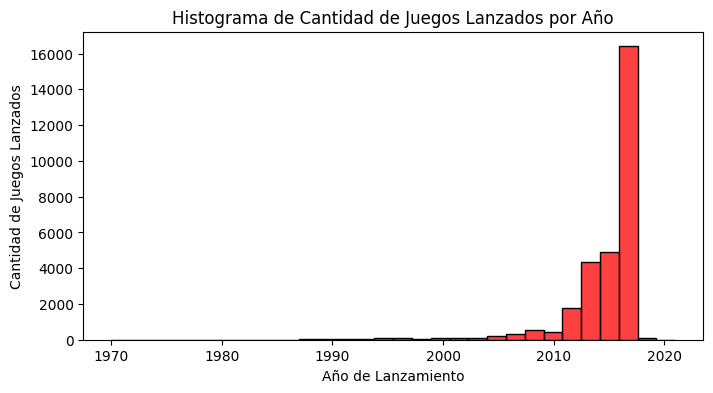

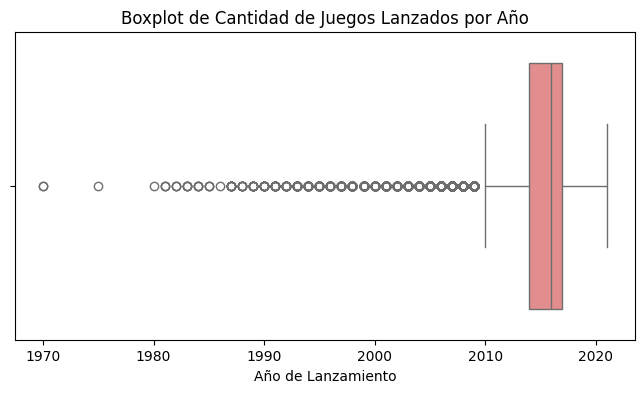

In [151]:
# Extraemos el año de la columna 'ReleaseDate'
df_OutputSteamGames['ReleaseYear'] = pd.to_datetime(df_OutputSteamGames['ReleaseDate']).dt.year

# Histograma
plt.figure(figsize=(8, 4))
sns.histplot(data=df_OutputSteamGames, x='ReleaseYear', bins=30, kde=False, color='red')
plt.title('Histograma de Cantidad de Juegos Lanzados por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Juegos Lanzados')
plt.show()

# Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_OutputSteamGames, x='ReleaseYear', color='lightcoral')
plt.title('Boxplot de Cantidad de Juegos Lanzados por Año')
plt.xlabel('Año de Lanzamiento')
plt.show()


Podemos ver el top 20 de los desarroladores de juegos con mas cantidad de juegos lanzados 

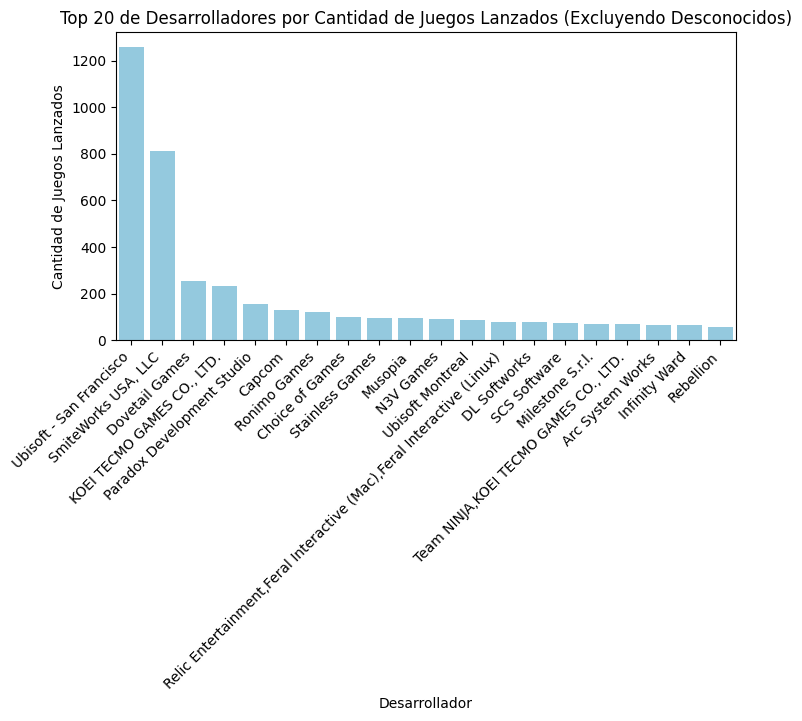

In [156]:
# Obtener el top 20 de desarrolladores por la cantidad de juegos lanzados, excluyendo "Desconocidos"
top_developers = df_OutputSteamGames[df_OutputSteamGames['Developer'] != 'Desconocido']['Developer'].value_counts().nlargest(20)

# Histograma
plt.figure(figsize=(8, 4))
sns.barplot(x=top_developers.index, y=top_developers.values, color='skyblue')
plt.title('Top 20 de Desarrolladores por Cantidad de Juegos Lanzados (Excluyendo Desconocidos)')
plt.xlabel('Desarrollador')
plt.ylabel('Cantidad de Juegos Lanzados')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()

Ahora guardamos el Dataframe en un .csv ya con los procesos de transformacion realizados

In [248]:
# Definimos la ruta relativa
ruta_relativa = os.path.join('Datasets-Limpios', 'output_games.parquet')

# Guardamos el DataFrame en un archivo CSV con la ruta relativa
df_OutputSteamGames.to_parquet(ruta_relativa, index=False)

---------------------------------------------------------

Analizamos el Dataframe df_UserReviews

In [176]:
# vamos a verificar como esta el dataframe
df_UserReviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58431 entries, 0 to 59304
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DatePosted  58431 non-null  object
 1   ItemId      58431 non-null  int32 
 2   Recommend   58431 non-null  bool  
 3   Review      58431 non-null  object
 4   UserId      58431 non-null  object
 5   YearPosted  58431 non-null  object
dtypes: bool(1), int32(1), object(4)
memory usage: 2.5+ MB


In [158]:
# Chequeamos el dataframe
df_UserReviews.head()

,funny,posted,last_edited,item_id,helpful,recommend,review,user_id,user_url
0,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,76561197970982479,http://steamcommunity.com/profiles/76561197970...
2,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479,http://steamcommunity.com/profiles/76561197970...
3,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,js41637,http://steamcommunity.com/id/js41637
4,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,js41637,http://steamcommunity.com/id/js41637


Chequeamos los duplicados y los tratamos

In [159]:
# Duplicados
duplicates = df_UserReviews.duplicated()
print(f'Número total de filas duplicadas: {duplicates.sum()}')

Número total de filas duplicadas: 874


In [160]:
# Borro los duplicados
df_UserReviews.drop_duplicates(inplace=True)

In [161]:
# chequeamos como quedo
duplicates = df_UserReviews.duplicated()
print(f'Número total de filas duplicadas: {duplicates.sum()}')

Número total de filas duplicadas: 0


Ahora vamos a borrar las columnas que no nos sirven para el proyecto

In [162]:
# Vemos las columnas que tenemos
df_UserReviews.columns

Index(['funny', 'posted', 'last_edited', 'item_id', 'helpful', 'recommend',
       'review', 'user_id', 'user_url'],
      dtype='object')

In [163]:
# Vamos a borrar las columnas que no vamos a utilizar para el proyecto(last edited,  user_url, funny, helpful)
df_UserReviews.drop(columns= ['last_edited', 'user_url', 'funny','helpful'], inplace=True)

In [164]:
# chequeamos como quedo el dataframe
df_UserReviews.tail()

,posted,item_id,recommend,review,user_id
59300,Posted July 10.,70,True,a must have classic from steam definitely wort...,76561198312638244
59301,Posted July 8.,362890,True,this game is a perfect remake of the original ...,76561198312638244
59302,Posted July 3.,273110,True,had so much fun plaing this and collecting res...,LydiaMorley
59303,Posted July 20.,730,True,:D,LydiaMorley
59304,Posted July 2.,440,True,so much fun :D,LydiaMorley


Vamos a reorganizar y cambiar los nombres de las columnas

In [165]:
# Chequeamos cuales son los nombres del dataframe
df_UserReviews.columns

Index(['posted', 'item_id', 'recommend', 'review', 'user_id'], dtype='object')

In [166]:
# Vemos como quedaron las columnas con los nombres cambiados eb df_UserItems
df_UserItems.columns

Index(['ItemId', 'ItemName', 'PlaytimeForever', 'UserId', 'ItemsCount'], dtype='object')

Identificamos que ItemName de la Tabla df_UserItems es la misma que item_id de la tabla df_UserReviews, podemos usar el mismo nombre

In [167]:
# vamos a renombrar las columnas en una manera standard y siguiendo buenas practicas 
df_UserReviews = df_UserReviews.rename(columns={'posted': 'DatePosted'})
df_UserReviews = df_UserReviews.rename(columns={'item_id': 'ItemId'})
df_UserReviews = df_UserReviews.rename(columns={'recommend': 'Recommend'})
df_UserReviews = df_UserReviews.rename(columns={'review': 'Review'})
df_UserReviews = df_UserReviews.rename(columns={'user_id': 'UserId'})

In [168]:
# chequeamos como quedaron los cambios de nombres de las columnas
df_UserReviews.columns

Index(['DatePosted', 'ItemId', 'Recommend', 'Review', 'UserId'], dtype='object')

Chequeamos el tipo de datos de las columnas

In [169]:
df_UserReviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58431 entries, 0 to 59304
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DatePosted  58431 non-null  object
 1   ItemId      58431 non-null  object
 2   Recommend   58431 non-null  bool  
 3   Review      58431 non-null  object
 4   UserId      58431 non-null  object
dtypes: bool(1), object(4)
memory usage: 2.3+ MB


In [170]:
# Vamos a cambiar el tipo de datos para las columnas ItemId
df_UserReviews['ItemId'] = df_UserReviews['ItemId'].astype(int)

In [171]:
# ahora vemos el campo DatePosted que tiene un mal formato
df_UserReviews['DatePosted']

0         Posted November 5, 2011.
1            Posted July 15, 2011.
2           Posted April 21, 2011.
3            Posted June 24, 2014.
4        Posted September 8, 2013.
                   ...            
59300              Posted July 10.
59301               Posted July 8.
59302               Posted July 3.
59303              Posted July 20.
59304               Posted July 2.
Name: DatePosted, Length: 58431, dtype: object

In [172]:
# Ahora vamos a ver como podemos modificarlo para que nos quede en un formato correcto
#quitamos la palabra posted, las comas y puntos
df_UserReviews.DatePosted=df_UserReviews.DatePosted.str.removeprefix('Posted').str.replace(',','').str.replace('.','')

C:\Users\frank\AppData\Local\Temp\ipykernel_4740\2829926832.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_UserReviews.DatePosted=df_UserReviews.DatePosted.str.removeprefix('Posted').str.replace(',','').str.replace('.','')


In [173]:
# sacamos el año de la columna posted y creamos una nueva columna con el año solamente
df_UserReviews['YearPosted']=df_UserReviews.DatePosted.str.split(expand=True)[2]
df_UserReviews.head()

,DatePosted,ItemId,Recommend,Review,UserId,YearPosted
0,November 5 2011,1250,True,Simple yet with great replayability. In my opi...,76561197970982479,2011
1,July 15 2011,22200,True,It's unique and worth a playthrough.,76561197970982479,2011
2,April 21 2011,43110,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479,2011
3,June 24 2014,251610,True,I know what you think when you see this title ...,js41637,2014
4,September 8 2013,227300,True,For a simple (it's actually not all that simpl...,js41637,2013


In [174]:
# Ahora chequeamos cuantos nulos nos quedo en la nueva columna YearPosted
df_UserReviews['YearPosted'].isnull().sum()

9933

In [175]:
# Vamos a rellenar los años faltantes en el campo YearPosted con el año 2016 ya que es el año en donde
# fue la fecha de Release del titulo
df_UserReviews.YearPosted.fillna('2016',inplace=True)

In [178]:
# Ahora chequeamos nuevamente como quedo el tratamiento que hicimos
df_UserReviews['YearPosted'].isnull().sum()

0

In [179]:
# Por ultimo vamos a borrar la columna en donde sacamos el año y ya no tiene utilidad
df_UserReviews.drop(columns='DatePosted', inplace=True)

In [180]:
# Para Terminar el proceso de transformacion en este dataframe vamos a cambiar el tipo de dato de YearPosted, que fue
# creado con el año que se creo la review, por int ya que representa un numero con el año solamente
df_UserReviews['YearPosted'] = df_UserReviews['YearPosted'].astype(int)

In [181]:
# Chequeamos como quedaron los tipos de datos en las columnas
df_UserReviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58431 entries, 0 to 59304
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ItemId      58431 non-null  int32 
 1   Recommend   58431 non-null  bool  
 2   Review      58431 non-null  object
 3   UserId      58431 non-null  object
 4   YearPosted  58431 non-null  int32 
dtypes: bool(1), int32(2), object(2)
memory usage: 1.8+ MB


In [182]:
df_UserReviews.head()

,ItemId,Recommend,Review,UserId,YearPosted
0,1250,True,Simple yet with great replayability. In my opi...,76561197970982479,2011
1,22200,True,It's unique and worth a playthrough.,76561197970982479,2011
2,43110,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479,2011
3,251610,True,I know what you think when you see this title ...,js41637,2014
4,227300,True,For a simple (it's actually not all that simpl...,js41637,2013


In [183]:
df_UserReviews.tail()

,ItemId,Recommend,Review,UserId,YearPosted
59300,70,True,a must have classic from steam definitely wort...,76561198312638244,2016
59301,362890,True,this game is a perfect remake of the original ...,76561198312638244,2016
59302,273110,True,had so much fun plaing this and collecting res...,LydiaMorley,2016
59303,730,True,:D,LydiaMorley,2016
59304,440,True,so much fun :D,LydiaMorley,2016


In [184]:
df_UserReviews.isnull().sum()

ItemId        0
Recommend     0
Review        0
UserId        0
YearPosted    0
dtype: int64

In [188]:
df_UserReviews.describe()

,ItemId,YearPosted
count,58431.00,58431.00
mean,169703.67,2014.46
std,132019.79,1.04
min,10.00,2010.00
25%,8930.00,2014.00
50%,218230.00,2014.00
75%,261640.00,2015.00
max,527340.00,2016.00


In [189]:
df_UserReviews['Recommend'].describe()

count     58431
unique        2
top        True
freq      51692
Name: Recommend, dtype: object

In [191]:
df_UserReviews['YearPosted'].describe()

count   58431.00
mean     2014.46
std         1.04
min      2010.00
25%      2014.00
50%      2014.00
75%      2015.00
max      2016.00
Name: YearPosted, dtype: float64

Podemos ver los siguientes datos:

Se puede ver que las recomendaciones en este caso superan los juegos recomendados a los no recomendados

Se puede ver que las reviews empiezan en el año 2010 y terminan en el 2016

Lamayor cantidad de reviews son del año 2016

ItemId y YearPosted Boxplot: Proporciona información sobre la dispersión y la presencia de valores atípicos.

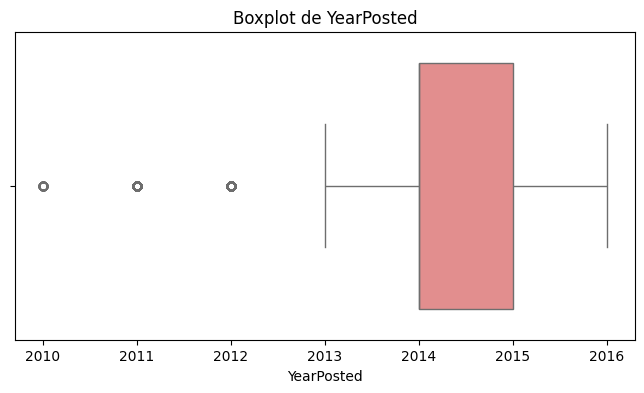

In [194]:
# Boxplot para YearPosted
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_UserReviews['YearPosted'], color='lightcoral')
plt.title('Boxplot de YearPosted')
plt.xlabel('YearPosted')
plt.show()


UserId (Histograma y Boxplot):

Histograma: Distribución de la cantidad de revisiones por usuario.

Boxplot: Variabilidad de la cantidad de revisiones por usuario.

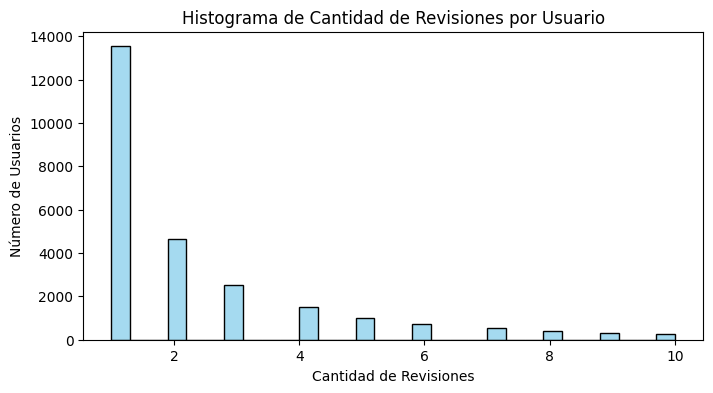

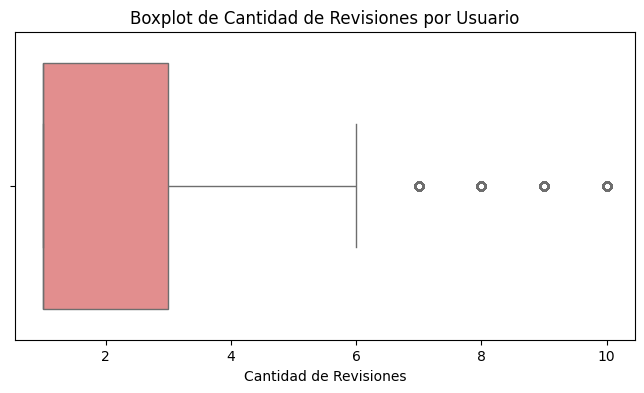

In [196]:
# Histograma para UserId
plt.figure(figsize=(8, 4))
sns.histplot(df_UserReviews['UserId'].value_counts(), bins=30, kde=False, color='skyblue')
plt.title('Histograma de Cantidad de Revisiones por Usuario')
plt.xlabel('Cantidad de Revisiones')
plt.ylabel('Número de Usuarios')
plt.show()

# Boxplot para UserId
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_UserReviews['UserId'].value_counts(), color='lightcoral')
plt.title('Boxplot de Cantidad de Revisiones por Usuario')
plt.xlabel('Cantidad de Revisiones')
plt.show()


Campos Categóricos:
Recommend (Conteo de Recomendaciones):

Barplot: Visualizar la distribución de las recomendaciones

C:\Users\frank\AppData\Local\Temp\ipykernel_4740\4005208096.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_UserReviews['Recommend'], palette='deep')


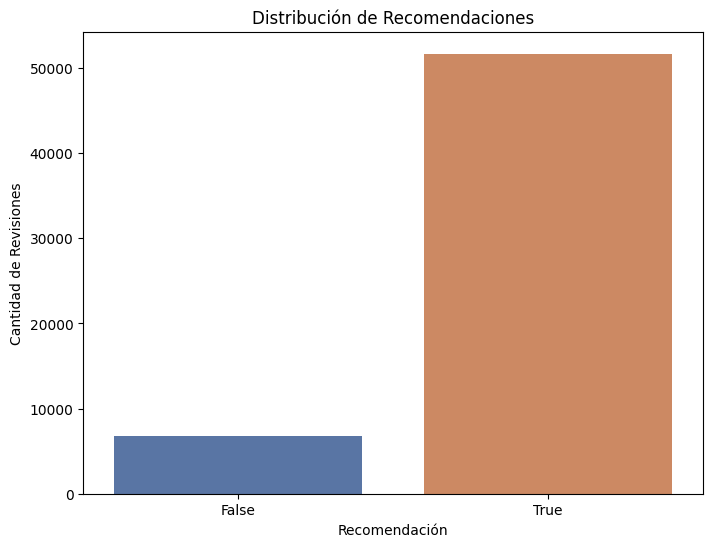

In [200]:
# Barplot para Recommend
plt.figure(figsize=(8, 6))
sns.countplot(x=df_UserReviews['Recommend'], palette='deep')
plt.title('Distribución de Recomendaciones')
plt.xlabel('Recomendación')
plt.ylabel('Cantidad de Revisiones')
plt.show()


Por ultimo vamos a crear el .csv con la transformacion y limpieza hecha

In [272]:
# Definimos la ruta relativa
ruta_relativa = os.path.join('Datasets-Limpios', 'user_reviews.parquet')

# Guardamos el DataFrame en un archivo CSV con la ruta relativa
df_UserReviews.to_parquet(ruta_relativa, index=False)